In [1]:
# Import useful libraries
import numpy as np
import matplotlib.pyplot as plt

### (Overdamped) Langevin equation
\begin{eqnarray}
dx_t = - \frac{1}{\gamma m} \frac{d}{dx}V(x_t)dt + \sqrt{2 D} \, dB_t
\end{eqnarray}

#### Approximated solution (Euler-Maruyama integrator)

\begin{eqnarray}
x_{k+1} = x_k - \frac{1}{\gamma m} \frac{d}{dx}V(x_k)\Delta t + \sqrt{2 D \Delta t} \, \eta_k
\end{eqnarray}

where $\Delta t$ is the integrator timestep, $m$ is the mass of a particle, $\gamma$ the friction between the particle and the solvent, $D$ is the diffusion constant, $\beta = \frac{1}{k_B T}$ with $k_B$ Boltzmann constant and $\eta_k$ is a random number drawn from a normal distribution (mean = 0 and std = 1).

The diffusion constant, the mass and $\beta$ are related by:

\begin{eqnarray}
D = \frac{k_B T}{\gamma m} = \frac{1}{\beta \gamma m}
\end{eqnarray}

In [2]:
# System parameters
kB     = 0.008314463                 # kJ mol-1 K
T      = 300                         # K   
mass   = 1                           # amu mol-1
gamma  = 0.5                         # ps-1 
D      = kB * T / mass / gamma       # nm2 ps-1
beta   = 1 / kB / T                  # kJ-1 mol 

# Integrator parameters
dt     = 0.001                       # ps 

### Simulation of harmonic potential

Consider the potential 

\begin{eqnarray}
V(x) = \frac{1}{2} k_{spring} x^2 \, ,
\end{eqnarray}

with derivative

\begin{eqnarray}
\frac{d}{dx} V(x) = k_{spring} x \, .
\end{eqnarray}

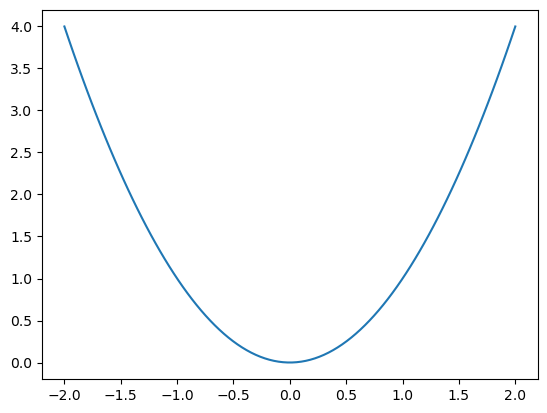

In [3]:
# Spring constant
ks = 2    # J nm-1

def V(x):
    return 0.5 * ks * x ** 2           

def dVdx(x):
    return ks * x                      

xmin       = -2
xmax       =  2
xvalues    = np.linspace(xmin, xmax, 100)
dx         = xvalues[1] - xvalues[0]

plt.plot(xvalues, V(xvalues))

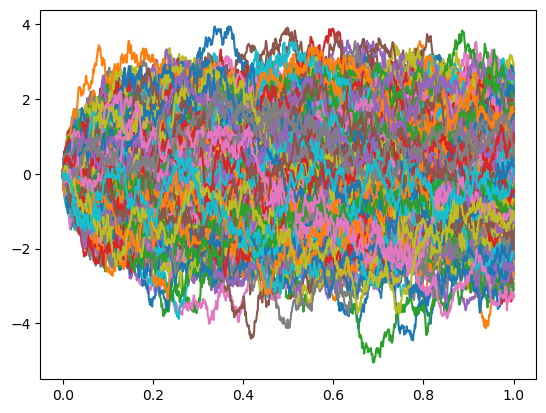

In [8]:
# Number of simulations
N      = 1000

# Number of timesteps per each trajectory
Nsteps = 1000

# Timestep
dt     = 0.001

# Array where to store the trajectories (this is a matrix)
X      = np.zeros((Nsteps, N))

# Initial position
x0     = 0


# Assign initial condition to each trajectory
X[0,:] = x0

# Double for loop
for k in range(Nsteps-1):
    eta      = np.random.normal(0, 1, N)
    X[k+1,:] = X[k,:] - 1 / gamma / mass * dVdx(X[k,:]) * dt + np.sqrt(2 * D * dt) * eta
    
# Plot all trajectories
t = np.linspace(0, Nsteps * dt, Nsteps)
plt.plot(t, X);

### Boltzmann distribution

At equilibrium the system converges to the Boltzmann distribution

\begin{eqnarray}
\pi(x) = \frac{1}{Q} \exp\left(- \beta  V(x) \right)\, ,
\end{eqnarray}

where $Q$ is the partition function that acts as a normalization constant:

\begin{eqnarray}
Q = \int \exp\left(- \beta  V(x) \right) dx
\end{eqnarray}

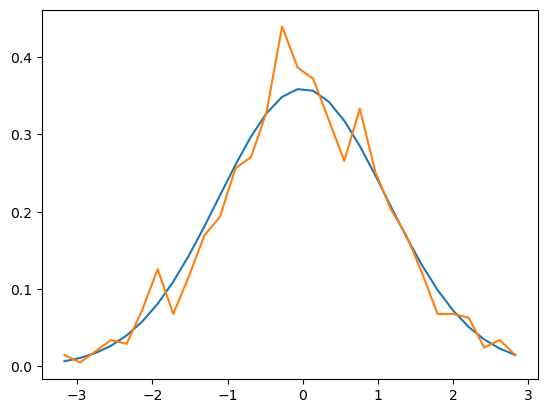

In [9]:
def pi(x, dx):
    Q = np.sum( np.exp(-beta * V(x)) * dx )
    return np.exp( - beta * V(x) ) / Q

# Build the histogram

# Define number of bins
Nbins = 30

# Calculate the histogram
h, x_edges  = np.histogram(X[-1,:], Nbins)

# Calculate the size of one bin interval
dx          =  x_edges[1] - x_edges[0]

# Shift the array x_edges by 0.5 * dx
x_centers   = x_edges + 0.5 * dx

# Remove the last entry of x_centers
x_centers   = x_centers[:-1]

# Normalization
p           = h / np.sum(h * dx)

# Plot the histogram
plt.plot(x_centers, pi(x_centers, dx))
plt.plot(x_centers, p)